In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('VTV4.csv')
df.head()

,Likes,Dislikes,Views,Comments,Title,Category_id,Date,Tags
0,0,0,14,0,VTV News 8h - 30/08/2021| VTV4,People & Blogs,2021-08-30T03:20:31Z,"['vietnam', 'vtv', 'vtv4', 'travel', 'Việt Nam']"
1,28,3,7027,1,Bản tin thời sự tiếng Việt 21h - 29/08/2021| VTV4,People & Blogs,2021-08-29T14:59:11Z,"['vietnam', 'vtv', 'vtv4', 'travel', 'Việt Nam']"
2,10,2,1102,0,Tình nguyện viên Việt Nam tại Thế vận hội |202...,People & Blogs,2021-08-29T12:31:24Z,"['vietnam', 'vtv', 'vtv4', 'travel', 'Việt Nam']"
3,20,3,914,0,Đường dây nóng kết nối tình quân dân | VTV4,People & Blogs,2021-08-29T11:26:59Z,"['vietnam', 'vtv', 'vtv4', 'travel', 'Việt Nam']"
4,0,0,2520,0,Chàng trai Ucraina và tình yêu với thanh âm củ...,People & Blogs,2021-08-29T09:56:57Z,"['vietnam', 'vtv', 'vtv4', 'travel', 'Việt Nam']"


In [4]:
# Drop N/A values
#df.dropna(inplace=True)

In [9]:
# Clean Tags column
#import ast
#df['Tags'] = df['Tags'].apply(lambda x: ast.literal_eval(x))

In [10]:
# Clean Date column
from dateutil import parser
df['Date'] = df['Date'].apply(lambda x: parser.parse(x[:10]))

In [11]:
# Create some columns
df['Favorite'] = df['Likes'] / (df['Likes'] + df['Dislikes'])
df['Hate'] = df['Dislikes'] / (df['Likes'] + df['Dislikes'])
df['Dislike_ratio'] = df['Dislikes']/df['Views']

In [12]:
# Standardize Hate and Dislike ratio and combine together
df['Dislike_index'] = (df['Hate'] - df['Hate'].mean())/df['Hate'].std() + (
                      df['Dislike_ratio'] - df['Dislike_ratio'].mean())/df['Dislike_ratio'].std()

In [13]:
res = df[df['Views'] > 20000].sort_values(by=['Dislike_index'], ascending=False).head(10)
res

,Likes,Dislikes,Views,Comments,Title,Category_id,Date,Tags,Favorite,Hate,Dislike_ratio,Dislike_index
1026,731,1290,78831,271,Nghĩa vụ quân sự - Môi trường rèn luyện thể ch...,People & Blogs,2021-06-30,"['vietnam', 'vtv', 'vtv4', 'travel', 'Việt Nam']",0.361702,0.638298,0.016364,19.359025
429,695,1007,157237,12,Góp phần tạo miễn dịch cộng đồng bằng vắc xin ...,People & Blogs,2021-08-03,"['vietnam', 'vtv', 'vtv4', 'travel', 'Việt Nam']",0.408343,0.591657,0.006404,10.131841
119,2838,1397,398759,103,Lợi dụng báo chí cộng đồng để chống phá Việt N...,People & Blogs,2021-08-22,"['vietnam', 'vtv', 'vtv4', 'travel', 'Việt Nam']",0.670130,0.329870,0.003503,5.059147
570,101,78,44783,21,Lễ tuyên thệ của Thủ tướng Chính phủ Phạm Minh...,People & Blogs,2021-07-26,"['vietnam', 'vtv', 'vtv4', 'travel', 'Việt Nam']",0.564246,0.435754,0.001742,4.523858
264,114,81,44337,1,Tổng bí thư Nguyễn Phú Trọng dự phiên họp đầu ...,People & Blogs,2021-08-11,"['vietnam', 'vtv', 'vtv4', 'travel', 'Việt Nam']",0.584615,0.415385,0.001827,4.403201
99,179,55,22100,37,Phimmoi.net và chữ Z “bất diệt” | VTV4,People & Blogs,2021-08-23,"['vietnam', 'vtv', 'vtv4', 'travel', 'Việt Nam...",0.764957,0.235043,0.002489,3.253517
6930,204,71,34715,6,Trực tiếp: Bản tin chào năm mới 2020,People & Blogs,2019-12-31,NaN,0.741818,0.258182,0.002045,3.084985
658,1537,374,145350,260,Đối diện: Phản bác thông tin xuyên tạc về con ...,People & Blogs,2021-07-22,"['vietnam', 'vtv', 'vtv4', 'travel', 'Việt Nam']",0.804291,0.195709,0.002573,2.949943
3392,82,36,27958,3,75 năm cuộc Tổng tuyển cử đầu tiên | VTV4,People & Blogs,2021-01-06,NaN,0.694915,0.305085,0.001288,2.867935
2178,24,14,24626,4,Bộ Y tế sẽ thu hồi vắc xin nếu địa phương nào ...,People & Blogs,2021-04-17,"['vietnam', 'vtv', 'vtv4', 'travel']",0.631579,0.368421,0.000569,2.842684


Text(0.5, 0, 'Dislike Index')

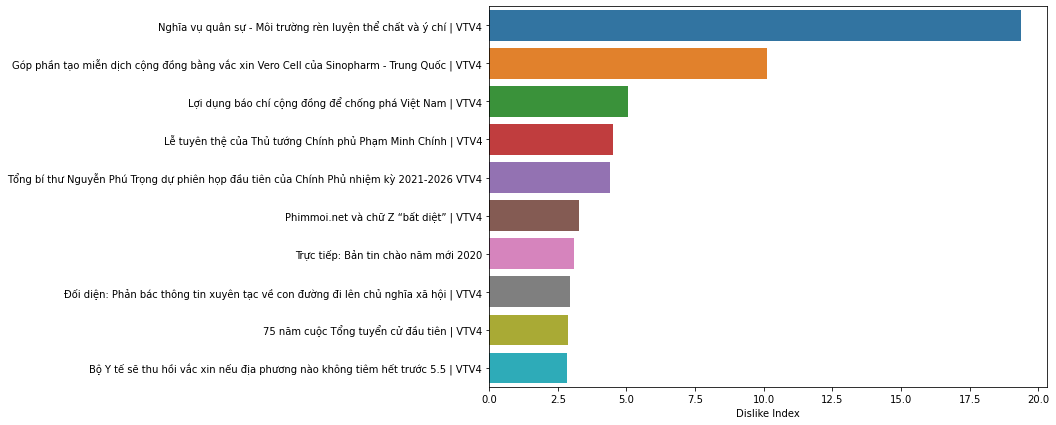

In [14]:
plt.figure(figsize=(10, 7))
sns.barplot(y='Title', x='Dislike_index', data=res)
plt.ylabel('')
plt.xlabel('Dislike Index')